## Campo afuera de la esfera

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad

In [2]:
# Parámetros
V0 = 1.0  # Potencial inicial
a = 1.0   # Radio de la esfera

# Función para calcular el coeficiente B_l
def calculate_B_l(l, r):
    integral_1, _ = quad(lambda theta: legendre(l)(np.cos(theta)) * np.sin(theta), 0, np.pi/2)
    integral_2, _ = quad(lambda theta: legendre(l)(np.cos(theta)) * np.sin(theta), np.pi/2, np.pi)
    return ((2 * l + 1) * a**(l + 1) / (2 * r**(l + 1))) * V0 * (integral_1 - integral_2)

# Función para calcular el potencial eléctrico fuera de la esfera en un punto (r, theta)
def electric_potential_outside(r, theta, max_l):
    potential = 0
    for l in range(max_l + 1):
        coefficient = calculate_B_l(l, r)
        legendre_value = legendre(l)(np.cos(theta))
        potential += coefficient * legendre_value
    return potential

# Funciones para calcular las componentes del campo eléctrico
def electric_field_r(r, theta, max_l):
    return -np.gradient(electric_potential_outside(r, theta, max_l), r)

def electric_field_theta(r, theta, max_l):
    return -1 / r * np.gradient(electric_potential_outside(r, theta, max_l), theta)


In [15]:
# Coordenadas para la grilla
r_values = np.linspace(1, 2, 100)
theta_values = np.linspace(0, np.pi, 100)
R, Theta = np.meshgrid(r_values, theta_values)

In [16]:
# Calcular las componentes del campo eléctrico
E_r_values = electric_field_r(r_values, np.pi/4, max_l=10)
E_theta_values = electric_field_theta(a*2, theta_values, max_l=10)

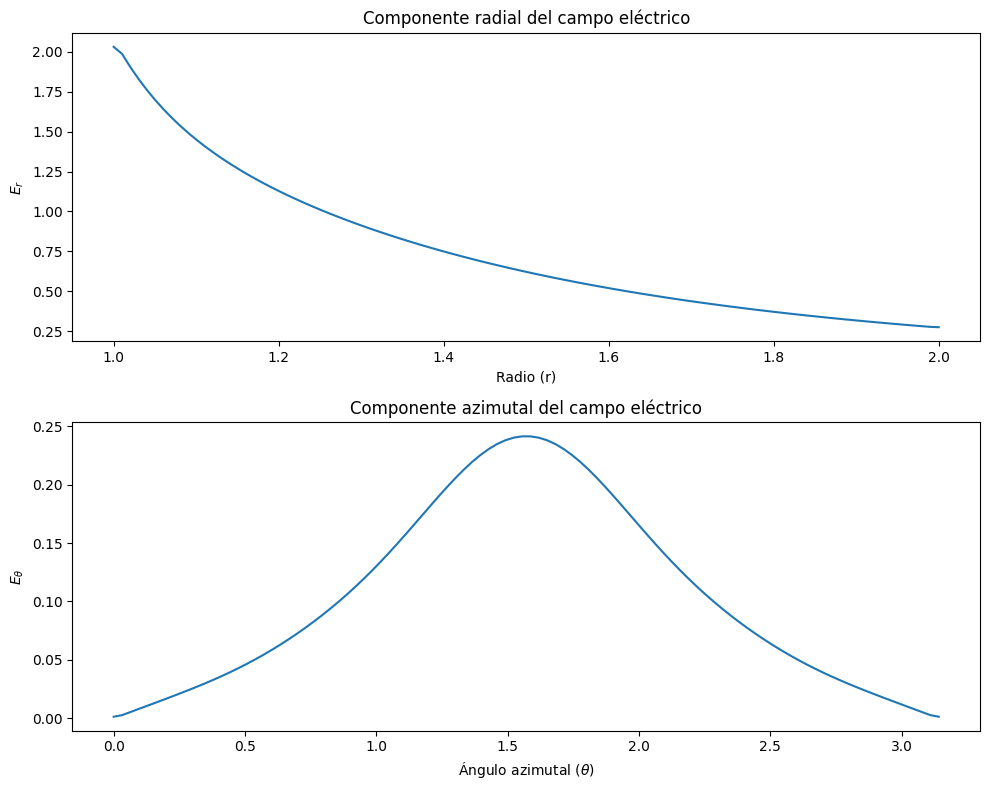

In [17]:
# Graficar las componentes del campo eléctrico
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(r_values, E_r_values)
axs[0].set_title('Componente radial del campo eléctrico')
axs[0].set_xlabel('Radio (r)')
axs[0].set_ylabel('$E_r$')

axs[1].plot(theta_values, E_theta_values)
axs[1].set_title('Componente azimutal del campo eléctrico')
axs[1].set_xlabel(r'Ángulo azimutal ($\theta$)')
axs[1].set_ylabel(r'$E_{\theta}$')

plt.tight_layout()
plt.show()
